# Исследование данных о российском кинопрокате


**Цели исследования**:\
Изучить рынок российского кинопроката и выявить текущие тренды, уделив внимание фильмам, получившим государственную поддержку.



**Задачи**

Ответить на вопросы:
1. Сколько фильмов выходило в прокат каждый год?
2. Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.? Проанализировать, как эта доля менялась по годам.
3. Как менялась динамика проката по годам, в каком году сумма сборов была минимальной и максимальной?
4. Какая средняя и медианная сумма сборов для каждого года?
5. Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да,то с чем это может быть связано?
____________________________
6. Исследовать фильмы, которые получили государственную поддержку.
7. Посмотреть, сколько выделяют средств на поддержку кино. Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг. 

## Открываем файлы с данными и объединяем их в один датафрейм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Открываем датасет mkrf_movies
try:
    df_movies = pd.read_csv ('/datasets/mkrf_movies.csv')
except:
    df_movies = pd.read_csv ('mkrf_movies.csv')
#df_movies.sample(5)
df_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
# датасет mkrf_movies - выводим инфолрмацию о датасете, смотрим тип данных и их полноту.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# Открываем датасет mkrf_movies
try:
    df_shows = pd.read_csv ('/datasets/mkrf_shows.csv')
except:
    df_shows = pd.read_csv ('mkrf_shows.csv')
#df_shows.sample()
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
# датасет mkrf_shows - выводим инфолрмацию, смотрим тип данных и их полноту.
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединяем mkrf_movies  и mkrf_shows.\
Перед объединением приводим данные в одноимённых столбцах к единому формату - str, так как хотя данные и выражены цифрами, параметр не имеет количественного значения.

In [6]:
# меняем формат данных и сразу проверяем
df_shows['puNumber'] = df_shows['puNumber'].astype('str')

# объединяем датафреймы в новую переменну. с которой будем работать
df_cinema = df_movies.merge(df_shows, on = 'puNumber', how = 'left')
#df_cinema.info()

## Предобработка данных

### Проверка типов данных

Проверяем типы данных в новом датафрейме и преобразуем их там, где это необходимо.

In [7]:
# объединённый датасет df_cinema - выводим общую инфолрмацию
df_cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Объединение удалось - появился чтолбец box_office из второй таблицы с 3158 ненулевыми значениями, как и было изначально, Кол-во строк не увеличилось, значит все индексы нашли своё соответствие.

Требуется изменение формата данных.\
У столбца show_start_date изменение формата даты/времени.\
У столбца ratings формат object целесообразно поменять на float, чтобы иметь возможность производить подсчёиы рейтингов, кргда это будет необходимо.

In [8]:
# меняем формат даты
df_cinema['show_start_date'] = pd.to_datetime(df_cinema['show_start_date'])
#df_cinema['show_start_date']

In [9]:
#df_cinema['ratings'] = df_cinema['ratings'].astype('float')

Попытка изменить формат столбца 'ratings' не удалась - получена ошибка. В столбце присутствуют нечисловые данные.\
Посмотрим, что они из себя представляют.

In [10]:
df_cinema['ratings'].value_counts()

ratings
6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
90%      1
62%      1
64%      1
9.1      1
Name: count, Length: 94, dtype: int64

В столбце 'ratings' есть как числовые дробные значения, так и числа со знаком процента.\
\
Так как нас интересует рейтинг на КиноПоиске (дробь от 1 до 10), то число с процентом - это другой рейтинг. Почему и с какой целью они туда попали, нам не известно, но можно предположить, что если фильм не участвовал по какой-то причине в КиноПоиске и поле заполняли из других источников.\
Так как нас интересует популярность фильма, то не так важно, какой методикой выведен рейтинг. В любом случае принцип - чем больше цифра, тем выше популярность - соблюдается.\
\
Переведём процентный рейтинг в дробный.\
Тем соображением, что рейтинги могут не соответствовать друг другу, пренебрежем, так как в данном исследовании нас интересует не точность рейтингования, а более прикладной вопрос - текущие тренды и распределение популярности. 

In [11]:
# преобразуем процентные рейтинги и меняем формат столбца
df_cinema['ratings'] = df_cinema['ratings'].str.rstrip('%').astype(float)

In [12]:
# смотрим, сколько рейтингов получилось больше 10
display (df_cinema[df_cinema['ratings']>=10].shape)

# рейтинги, больше 10 (те, у которых был знак процента) приводим к общему виду
df_cinema.loc[df_cinema['ratings'] >= 10, 'ratings'] /= 10

# смотрим, сколько рейтингов больше 10 после преобразования
display (df_cinema[df_cinema['ratings']>=10].shape)

(29, 16)

(0, 16)

In [13]:
# проверим датафрейм
df_cinema.sample(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
497,На глубине морской 3D,122000312,2012-04-10 12:00:00+00:00,Документальный,"Говард Холл Продакшнз, Аймакс Корпорейшн, Уорн...",США - Канада,Говард Холл,Тони Майерс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"документальный,короткометражка",NaN
4401,Не брать живым /По книге Раджива Чандрасекарана/,221084310,2010-07-15 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Студио Канал, Рилейтивити М...",США - Франция - Испания - Великобритания,Пол Гринграсс,"Тим Беван, Ллойд Левин, Эрик Феллнер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"боевик,триллер,драма",NaN
3848,Посейдон,221035310,2010-04-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Рэдиант Продакшнз, Нихт Интерт...",США,Вольфганг Петерсен,"Вольфганг Петерсен, Данкан Хендерсон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"боевик,триллер,приключения",NaN


### Обработка пропусков

In [14]:
# объединённый датасет df_cinema - выводим инфолрмацию о  кол-ве пропусков в столбцах 
df_cinema.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Анализ структуры позволяет принять решения не проводить какую-либо замену пропусков на данном этапе.\
Корректное заполнение пропусков в столбцах:
- film_studio
- director
- producerр
- genres
- ratings

требуют работы не с этим датасетом, а с внешними источниками, что не входит в задачи исследования.\
\
Столбец 'box_office' получен из дополнительного датасета и его данные не могут быть экстраполированы на все фильмы.\
\
Столбцы с информацией о финансировании мы также не можем заполнить, так как финансирование по сути своей персонализировано и имеется только у ограниченного количества фильмов.\
\
**Столбец, где в первую очередь можно устранить пропуски,- production_country**, если из других данных можно будет сделать какой-либо вывод. И хотя таких строк всего две, сделаем это. 

In [15]:
df_cinema[df_cinema['production_country'].isna()].head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Это фильмы, снятые в России

In [16]:
#заполним и проверим
df_cinema['production_country'] = df_cinema['production_country']. fillna ('Россия')
df_cinema['production_country'].isna().sum()

0

### Дубликаты в датафрейме

In [17]:
df_cinema.duplicated().sum()

0

Строк - явных дубликатов в датафрейме нет.\
Но характер данных допускает большое количество однотипной информации, написанной совершенно по-разному - транскрипция имен и названий даёт огромное поле для импровизаций при вводе данных.\
\
Возможно, нам поможет столбец 'puNumber'\
\
Проверим гипотезу **"одно прокатное удостоверение - один фильм"**. Наличие дублей в столбце 'puNumber' позволит установить строки со скрытыми дубликатами, не зависимо от характера скрытого дублирования.  

In [18]:
#проверяем столбец 'puNumber'
duplicats = df_cinema[df_cinema['puNumber'].duplicated()]
duplicats

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [19]:
#посмотрим, что содержат эти дубли
df_cinema.query('(puNumber == "221154310") or (puNumber == "221054410")')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Обнаружено всего 2 дублирующихся номера прокатного удостоверения. Проверка показала, что это - **разные фильмы**.\
Гипотеза не подтвердилась - в датасете есть фильмы с одинаковым номером удостоверения.\
Это либо ошибки при вводе номеров, либо так действительно может быть: **одно удостоверение - несколько фильмов**


**Проверяем столбец 'title'**

In [20]:
#проверяем столбец 'title'
duplicats_title = df_cinema[df_cinema['title'].duplicated()]
duplicats_title

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Обнаружены дубликаты по столюцу с названием фильма. То есть, фильмы, имеющие более одного прокатного удостоверения.


**Ситуация интересна** тем, что у некоторых из них заполнен столюец box_office (сборы). И это **не одинаковые значения**.\
Та же ситуация и с рейтингами.\
Если мы удалим все дубликаты по 'title', мы потеряем для некоторых фильмов значительную часть информации о сборах и исказим рейтинги.\
И если с некоторыми неточностями в рейтинках можно смириться, то с потерей значимой части сборов (пример - строки 110 и 113) согласиться сложно.\
Так же не хотелось бы жертвовать строками с заполненной метрикой budget - их и так не очень много (всего 332 строки).



**Предлагается компромисс**, основанный на том, что потеря финансовых показатели может значительно больше исказить результаты, чем присутствие некоторых дубликатов по столбцу 'title.\
В конце концов, можно принять "логику первичного датасета",в котором один и тот же фильм с разными прокатными удостоверениями учтён как разные фильмы и, соответвенно, с разными финансовыми показателями (как минимум в том, что касается суммы сборов).  


In [21]:
# Создаем маску = дубли по столбцу title и  NaN в box_office и  budget 
mask_4 = (df_cinema.duplicated(subset='title')) & (df_cinema['box_office'].isna()) & (df_cinema['budget'].isna())
df_cinema = df_cinema[~mask_4]
df_cinema = df_cinema.reset_index(drop=True) 

In [22]:
#проверяем столбец 'title' ещё раз
duplicats_title_2 = df_cinema[df_cinema['title'].duplicated()]
duplicats_title_2

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
107,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
110,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
119,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фэнтези,приключения,семейный",843310.00
432,Белоснежка и охотник,121013012,2012-05-25 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"фэнтези,боевик,драма",470427.00
465,Отважная Лифи,124000512,2012-04-05 12:00:00+00:00,Анимационный,"Мьюнг Филмз, Одолтоджи",Южная Корея,Сон-Юн О,"Сун-ку Ким, Эун Ли",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"мультфильм,приключения,драма",200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6714,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2617932.50
6722,Игра с огнем,121029319,2019-10-10 12:00:00+00:00,Художественный,"Йал Продакшнз, Хопскоч Пикчерз, Фильм Моуд Инт...",США,Майк Ган,"Джордан Бекман, Суки Чю",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,триллер,281077.00
6753,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,20000000.0,75000000.0,Фонд кино,7.8,драма,3181218.00
6867,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51


**Результат компромиссного решения**: осталось 142 строка-дубликат по title из 714-и. Из датасета удалено 572 строки.

Но мы сохранили все строки с финансовыми показателями, несмотря на дублирование.


### Изучаем категориальные значения

В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. **Удалим их методом <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>**. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки.

**Категориальные значения** содержат столбцы:
- financing_source
- type
- production_country
- age_restriction
- genres\
и, с некоторым ограничением
- director

In [23]:
# проверяем столбец 'financing_source'
df_cinema['financing_source'].value_counts()

financing_source
Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: count, dtype: int64

Данные в порядке

In [24]:
#проверяем столбец 'type'
df_cinema['type'].value_counts()

type
Художественный                4026
 Художественный               1362
Анимационный                   796
Прочие                         393
Документальный                 283
Научно-популярный               52
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

In [25]:
# удаляем пробелы в начале и в конце строк в столбце 'type' и проверяем
df_cinema['type'] = df_cinema['type'].str.strip()
df_cinema['type'].value_counts()

type
Художественный                5388
Анимационный                   797
Прочие                         393
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
Name: count, dtype: int64

In [26]:
#проверяем столбец 'puNumber'
df_cinema['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2564
«12+» - для детей старше 12 лет           1497
«18+» - запрещено для детей               1467
«0+» - для любой зрительской аудитории     772
«6+» - для детей старше 6 лет              614
Name: count, dtype: int64

В столбце 'age_restriction' скрытых дубликатов нет.

**Исследуем данные в столбцах 'production_country', 'genres', 'director'**. Это столбцы с неоднородными данными. 

In [27]:
#проверяем столбец 'production_country'
df_cinema['production_country'].value_counts()

production_country
США                                                                    1852
Россия                                                                 1802
СССР                                                                    345
Франция                                                                 282
Великобритания                                                          242
                                                                       ... 
Греция - Россия                                                           1
Великобритания - Исландия - Испания - Швейцария - США                     1
Австралия - Великобритания - Бельгия - Индия                              1
Швеция - Германия - Франция - Норвегия                                    1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: count, Length: 943, dtype: int64

In [28]:
df_cinema = df_cinema.reset_index(drop=True)

df_cinema['production_country'] = df_cinema['production_country'].str.replace('-', ', ')
df_cinema['production_country'] = df_cinema['production_country'].str.replace(' - ', ', ')
df_cinema['production_country'] = df_cinema['production_country'].str.replace(' , ', ', ')
df_cinema['production_country'] = df_cinema['production_country'].str.replace(',', ', ')

df_cinema['production_country'].value_counts()

production_country
США                                                                          1852
Россия                                                                       1802
СССР                                                                          345
Франция                                                                       282
Великобритания                                                                242
                                                                             ... 
Россия,  Украина,  Польша                                                       1
Франция,   Италия,   Бельгия,   КНР                                             1
КНР,   Сингапур                                                                 1
Франция,   Бельгия,   Великобритания,   США,   Нидерланды,   Канада             1
Дания,   Канада,   Швеция,   Франция,   Германия,   Великобритания,   США       1
Name: count, Length: 916, dtype: int64

Дубликатов в столбце 'production_country' нет - кол-во уникальных значений до и после обработки совпалает

In [29]:
#проверяем столбец 'genres'
df_cinema['genres'].value_counts()

genres
драма                      452
комедия                    332
мелодрама,комедия          182
драма,мелодрама            171
драма,мелодрама,комедия    170
                          ... 
драма,комедия,триллер        1
драма,боевик,криминал        1
история,драма,мелодрама      1
драма,спорт,комедия          1
мелодрама,история,драма      1
Name: count, Length: 742, dtype: int64

In [30]:
df_cinema['genres'].nunique()
print ('оригинальных названий в столбце genres: ',(df_cinema['genres'].nunique()))

оригинальных названий в столбце genres:  742


Дубликатов в столбце 'genres' нет - кол-во уникальных значений до и после обработки совпалает

In [31]:
#df_cinema['director'].unique()
df_cinema['director'].nunique()
print ('оригинальных названий в столбце director: ',(df_cinema['director'].nunique()))

оригинальных названий в столбце director:  4795


Исследование столбцов, которые содержат категориальные значения, приводит к следуюшим выводам:\
Основная проблема - **отсутствие какоё-либо системы заполнение данных**.
1. Чисто технические ошибки, такие, как:
а) пробелы в начале и в конце строк,
б) неопределённость с пробелами до и после тире или запятой (то они есть, то их нет).
2. Осутствие системы в текстовой информации, вызванной прежде всего разнородностью содержания, источников и времени ввода.

И тот и другой тип ошибок, на наш взгляд, неизбежен.\
С одной стороны присутствует, человеческий фактор, с другой - объективная реальность.\
И если первую группу можно ликвидировать программными средствами, введя принудительное форматирование,то\
вторая группа практически не поддаётся систематизации, так как невозможно ввести какие- либо нормы для названий фильмов, студий и тп.\
Особенно это касаетсяя имён собственных - нет адекватных норм транскрипции с иностранных языковю.\
>В этом свете два таких разных написания имени одного и того же человека - ХЭрольд Рэмис / Гарольд Реймис в столбце 'director'- не вызывают удивления. И исправление точечной ошибки (большая Э ) в одном из вариантов вообще никакой роли не играет.

>Кроме того, даже при внесении одних и тех же данных разными людьми в разное время может применяться разный порядок слов, имён и названий, а также разное синтаксическое оформление (или скобки, или кавычки или тире в похожих ситуациях). Мы не можем предугадать все возможные варианты.

Мешает ли такое положение дел нашему исследованию?  Увидим в дальнейшем. Но ручная проверка однотипности написания нескольких тысяч строк, выглядит не лучшим решением. Ноэтому на данном этапе оставим всё так, как оно есть.\
\
Тем более, что проверка номеров прокатных удостоверений показала отсутствие явных дубликатов. (Именно этот номер является уникальным, кроме редких исключений, и достаточным для идентификации фильма.)

### Проверка количественных значений

#### Есть ли в таких столбцах подозрительные данные?

Стоит обратить внимание на описание столбца budget - как этот столбец соотносится с двумя другими: refundable_support и nonrefundable_support.

In [32]:
# выделяем в отдельную переменную столбци с количественными данными для их изучения
df_numeric = df_cinema.select_dtypes(include='number')

# посмотрим на данные, выведя несколько строк так, чтоб на экране были числовые значения, а не только NaN
#display(df_numeric[df_numeric['box_office'].notna()].sample(5))
display(df_numeric[df_numeric['box_office'].notna()].tail())

,refundable_support,nonrefundable_support,budget,ratings,box_office
6892,100000000.0,400000000.0,980000000.0,6.0,7.177032e+08
6894,100000000.0,0.0,190000000.0,6.7,5.010692e+08
6899,NaN,NaN,NaN,6.1,3.143790e+06
6900,NaN,NaN,NaN,3.9,1.800177e+07
6908,NaN,NaN,NaN,NaN,2.195690e+05


В столбце box_office данные представлены в экспоненциальном формате.\
Видно, что данные в столбце не однородны. При выводе случайных строк видно, что степень от 02 до 08, что говорит о большом разбросе, а  значит с данными что-то не в порядке.

Столбцы:
- refundable_support - объём возвратных средств государственной поддержки;
- nonrefundable_support - объём невозвратных средств государственной поддержки;
- financing_source - источник государственного финансирования;
- budget - общий бюджет фильма
содержат информацию 332  строках с фильмами, получившими гос. финансировании. 

При этом столбец budget включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.\
\
**Но в некоторых полях budget стоит 0.**\
Мы не знаем, есть ли в этих столбцах какие-либо  нечисловые данные.\
Поэтому применим метод, меняющий такие значения, если они есть, на NaN для всех столбцов о финансировании, а также в столбце 'box_office'. 

In [33]:
# применим метод, меняющий возможные нечисловые значения на NaN для всех финансовых столбцов

fin_columns = ['refundable_support','nonrefundable_support','budget', 'box_office',]
df_cinema[fin_columns] = df_cinema[fin_columns].apply(pd.to_numeric, errors='coerce')

Приведём все финансовые столбцы к единому виду единиц измерений - **млн руб**.\
Для столбца 'box_office'поставим округление **6 знаков**, для удобства восприятия (млн-тыс-ед).

In [34]:
# приведём все финансовые столбцы к единому виду единиц измерений - млн руб
df_cinema[fin_columns] = df_cinema[fin_columns].div(1000000)

# столбец 'box_office' не только приведём к единицам измерений - млн руб, но и поставим округление 6 знаков,
# для удобства восприятия
df_cinema['box_office'] = df_cinema['box_office'].round(decimals=6)

# для проверки посмотрим на данные, выведя несколько строк так, чтоб на экране были числовые значения, а не только NaN
df_numeric_3 = df_cinema.select_dtypes(include='number')
display(df_numeric_3[df_numeric_3['box_office'].notna()].tail())

,refundable_support,nonrefundable_support,budget,ratings,box_office
6892,100.0,400.0,980.0,6.0,717.703186
6894,100.0,0.0,190.0,6.7,501.069235
6899,NaN,NaN,NaN,6.1,3.143790
6900,NaN,NaN,NaN,3.9,18.001772
6908,NaN,NaN,NaN,NaN,0.219569


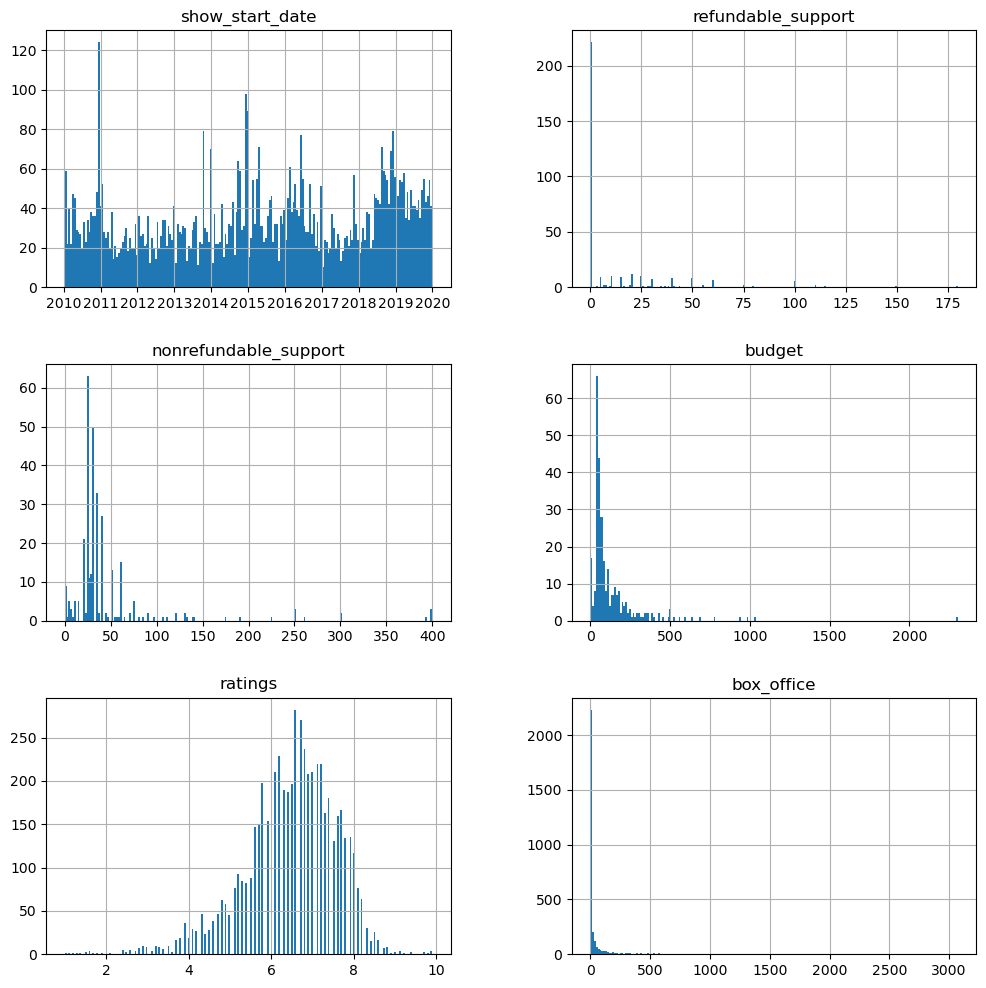

In [35]:
# Строим набор гистограмм для всех числовых столбцов таблицы на одном графике.
df_cinema.hist(bins=200,figsize=(12, 12));

Гистограммы вызывают вопросы.\
    1. Есть некоторое количество фильмов с бюджетом гос. поддержки ('budget') в районе нуля.\
    2. Есть значение в райлне 2,3 млрд руб общего бюджети гос. поддержки ('budget'). Так вполне может бюыть, но стоит в дальнейшем проверить корректность этого значения.\
    3. Много фильмов со значением выручки от проката ('box_office') в районе нуля. и с максимумом в 3 млрд (!) руб.

**Наблюдение: В столбце nonrefundable_support есть как NaN, так и ноль**\
Вероятно, что ноль стоит у тех фильмов, которые имеют отношение к гос. поддержке и говорит о том, что значение известно и оно - ноль. Поэтому оставим значение ноль без изменений.

#### Исследуем и исправляем столбец budget

In [36]:
budget_min = df_cinema.query('budget == 0')
budget_min.shape

(17, 16)

Обнаружены 17 фильмов, с бюджетом = 0\
При этом просмотр этих строк (который решено не приводить, из-за сображений лаконичности) показал, что в других столбцах о финансировании данные **не равны** нулю.\
А так как столбец budget уже включает в себя полный объём государственной поддержки, то значение ноль говорит об ошибках в вычислениях.
> Можно предположить, что общий бэджет содержит данные, включающие как сумму господдержки (двух видов),
так и объём внебыджетного финансирования.\
Для такого предположения есть основания - выбросы в районе миллиарда рублей и даже более 2,5 млрд.


Учитывая вышесказанное, исправим столбел budget, просуммировав соответствующие столбцы для тех строк,\
у которых budget **равен нулю или NaN**.

In [37]:
# делаем маску
mask_5 = df_cinema['refundable_support'] + df_cinema['nonrefundable_support']

# меняем нули и NaN на условие из маски
df_cinema['budget'] = df_cinema['budget'].fillna(mask_5).replace([0], [mask_5])
                              
# проверим кол-во нулевых строк 
budget_nul = df_cinema.query('budget == 0')
budget_nul.shape

(0, 16)

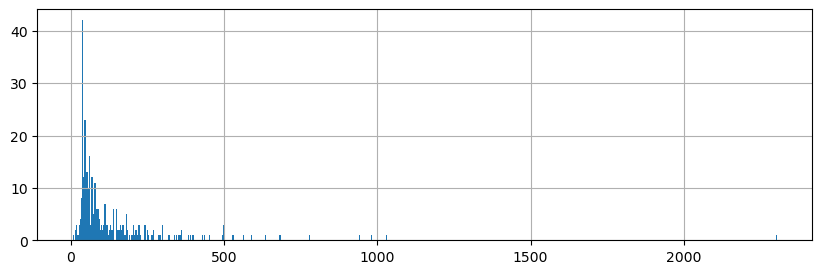

In [38]:
# Строим новую гистограмму
df_cinema['budget'].hist(bins=600,figsize=(10, 3));

Теперь в столбеце budget меньше нулевых значений, шаг пиков - 5 млн руб, что вызвано особенностями финансирования (суммы дотаций в большинстве случаев кратны 5 млн руб).


Посмотрим на выбросы более 750 млн руб.

In [39]:
budget_space = df_cinema.query('budget > 750')
#budget_space

Вывод фильтра закомментирован для экономии места и лаконичности.\
Нет оснований считать большие значения бюджетов выбросами. У нас нет инсайдерской информации о реальном бюдлжетировании таких фильмов. Оставим их, но будем иметь ввиду в дальнейшем.

#### Исследуем и исправляем столбец box_office

В процессе подготовки этого исследования, данные в метрике 'box_office' вызвали наибольший интерес.

Есть основания считать, что ноль в этом столбце (см. диаграмму выше) фактичесви осзначает отсутствие данных.\
**Чтобы нулевые значения не влияли на рассчет среднего и медианного значений, и некоторых других параметров - заменим нули на NaN** 

In [40]:
# кол-во нулевых значений
box_office_min = df_cinema.query('box_office == 0')
box_office_min.shape

(24, 16)

In [41]:
# заменим все нули на NaN
df_cinema['box_office'] = df_cinema['box_office'].mask(df_cinema['box_office'] == 0)
# и проверим
box_office_min = df_cinema.query('box_office == 0')
box_office_min.shape

(0, 16)

### Добавляем новые столбцы

In [42]:
# добавляем год проката и меняем формат на int
df_cinema['show_start_year'] = df_cinema['show_start_date'].dt.year.astype('int').round(decimals=0)
print()

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Создадим также столбец "Главная страна производства фильма" - 'main_country'. Он понадобится нам в дальнешем.

In [43]:
# Добавляем главного режиссёра
# Добавляем основной жанр
# Добавляем основную страну - это понадобится вдальнейшем

def first_names(column):
    return column.str.split(',').str[0].str.strip()

# Применим функции к столбцам
df_cinema['first_director'] = first_names(df_cinema['director'])
df_cinema['main_genre'] = first_names(df_cinema['genres'])
df_cinema['main_country'] = first_names(df_cinema['production_country'])

Добавляем столбец с информацией, какую долю от общего бюджета фильма составляет государственная поддержка.

In [44]:
# добавляем столбец с долей гос. финансирования в общем бюджете
df_cinema['share_gov_funding'] = ((df_cinema['refundable_support'] +\
                                   df_cinema['nonrefundable_support'])/df_cinema['budget']).round(decimals=2)
# проверяем результаты предыдущих действий
df_test_3 = df_cinema[df_cinema['share_gov_funding'].notna()]
df_test_3['share_gov_funding'].tail(3)

6902    0.53
6904    0.65
6906    0.67
Name: share_gov_funding, dtype: float64

In [45]:
# Посчитаем среднее и медианное значение доли господдержки в общем бюджете фильмов
df_share_gov_mean_med = df_cinema.agg({'share_gov_funding': ['median', 'mean']}).round(decimals=2)
df_share_gov_mean_med

,share_gov_funding
median,0.62
mean,0.54


**Можно увидеть, что кроме господдержки бюждеты фильмов включают в себя также средства из других источников.**

Проверим итоги предобработки данных

In [46]:
df_cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6914 entries, 0 to 6913
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6914 non-null   object             
 1   puNumber               6914 non-null   object             
 2   show_start_date        6914 non-null   datetime64[ns, UTC]
 3   type                   6914 non-null   object             
 4   film_studio            6897 non-null   object             
 5   production_country     6914 non-null   object             
 6   director               6905 non-null   object             
 7   producer               6355 non-null   object             
 8   age_restriction        6914 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**В результате обработки мы потеряли 572 строки из 7486, что составляет 7,6%.**

## Исследовательский анализ данных

- Количество фильмов, выходивших в прокат каждый год.
- Доля фильмов, имеющих в датасетах информацию о прокате в кинотеатрах. Её изменение по годам.

### Количественные показатели

In [47]:
# Сколько фильмов имеют данные о сборах
df_year_distribution = df_cinema.pivot_table(index='show_start_year', values='box_office', aggfunc='count')
#df_year_distribution

In [48]:
# Сколько фильмов выходило в прокат каждый год
df_year_start = df_cinema.pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
#df_year_start

In [49]:
# Объединяем и считьаем долю фильмов, имеющих данные о сборах
df_year_start_distrib = df_year_start.merge(df_year_distribution, on = 'show_start_year', how = 'left').sort_values(by = 'show_start_year',  ascending=False)
df_year_start_distrib['ratio_box_number'] = (df_year_start_distrib['box_office'] / df_year_start_distrib['puNumber']).round(decimals=2)
df_year_start_distrib

,puNumber,box_office,ratio_box_number
show_start_year,,,
2019,900,530,0.59
2018,878,475,0.54
2017,499,357,0.72
2016,796,525,0.66
2015,695,462,0.66
2014,752,273,0.36
2013,598,179,0.30
2012,529,123,0.23
2011,488,109,0.22


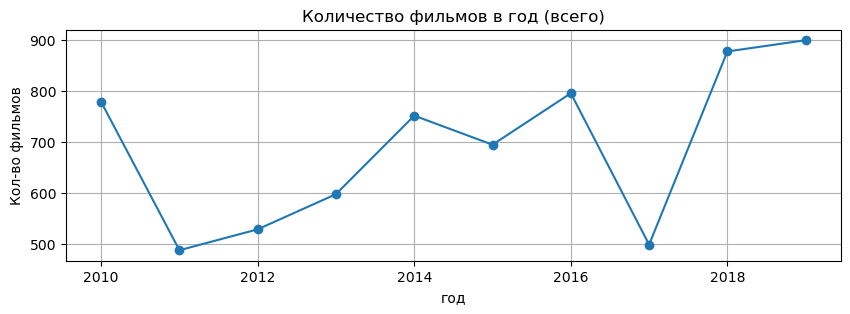

In [50]:
df_year_start_distrib['puNumber'].plot(style='o-', grid=True, figsize=(10, 3));
plt.title('Количество фильмов в год (всего)')
plt.xlabel('год')
plt.ylabel('Кол-во фильмов')
plt.show()

Не наблюдается какой-либо определённой тенденции связи года и количества фильмов, которую можно былобы установить исходя их имеющегося датаскта. Заментый пик в 2010 и провал в 2017 на графике может быть объяснён внешними факторами - финансовыми, юридическими, административными и т.п.  

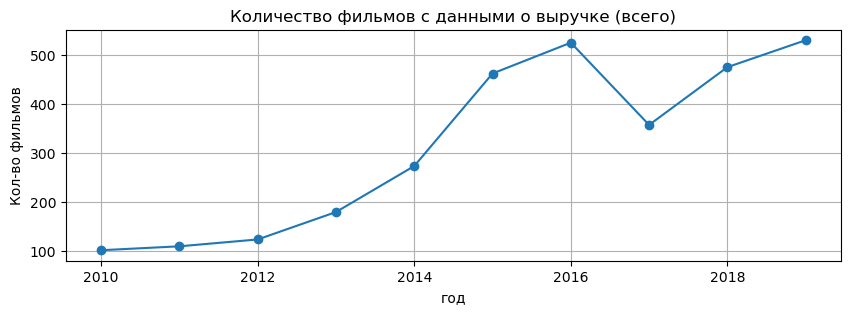

In [51]:
df_year_start_distrib['box_office'].plot(style='o-', grid=True, figsize=(10, 3));
plt.title('Количество фильмов с данными о выручке (всего)')
plt.xlabel('год')
plt.ylabel('Кол-во фильмов')
plt.show()

Есть определённая зависимость года и количества фильмов с данными о выручке.\
Количество таких фильмов растёт от года к году, за исключением 2017-го.\
Снижение в 17 году вызвано снижением общего количества фильмов, вышедших на экран в 2017 году, что мы видели на предыдущем графике.

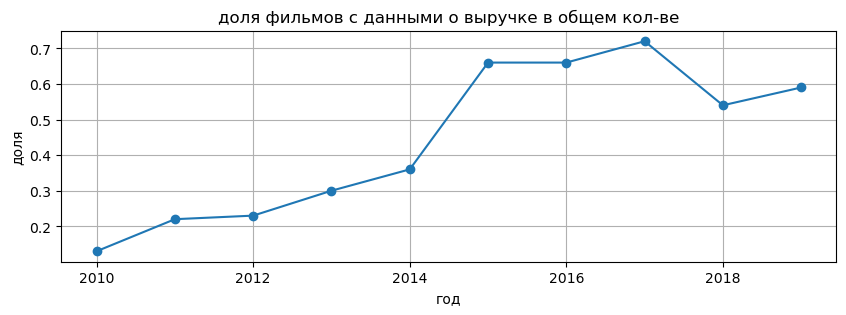

In [52]:
df_year_start_distrib['ratio_box_number'].plot(style='o-', grid=True, figsize=(10, 3))
plt.title('доля фильмов с данными о выручке в общем кол-ве')
plt.xlabel('год')
plt.ylabel('доля') 
plt.show()

Доля фильмов с указанной информацией о прокате в кинотеатрах имеет положительную тенденцию - количество таких фильмов растёт.\
Вероятно, эта тенденция связана с улучшением отчётности и совершенствованием нормативной базы в финансовой сфере.\
Полнее всего представлен в данных 2017 год. И хотя после него идёт некоторое снижение, в целом тренд положительный.

### Финансовые показатели

In [53]:
# Делаем сводную таблицу сборов по годам. (Помним про округление до 6 знаков)
year_distrib_count = df_cinema.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
year_distrib_count

,box_office
show_start_year,
2010,2.428654
2011,14.102765
2012,6.955423
2013,29.799708
2014,7444.951858
2015,39497.365189
2016,47866.299756
2017,48563.707218
2018,49668.403134


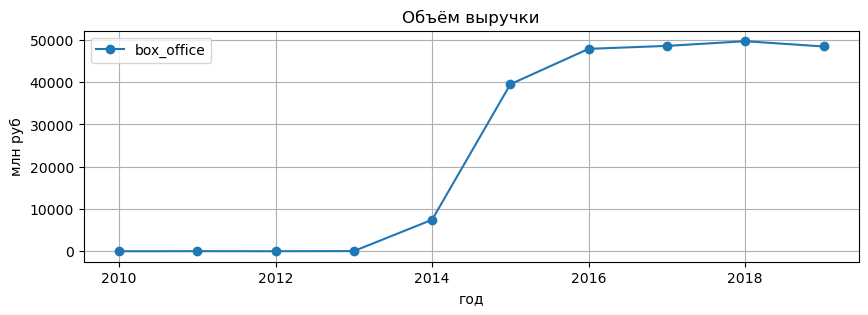

In [54]:
year_distrib_count.plot(style='o-', grid=True, figsize=(10, 3))
    
plt.title('Объём выручки')
plt.xlabel('год')
plt.ylabel('млн руб')
plt.show()

Так как нули мы заменили на NaN, то близкие к нулю значения с 2010 по 2013 г - результат особенностей данных.\
Проблема, видимо в том, что до 2015 года сбор данных о кассовых сборах не был налажен.

**График наглядно показывает 2 периода: 2010-2014 и 2015-2019**\
Внутри каждого из них график достаточно ровный, что говорит об устойчивости рынка кинопроката.\
\
При этом в период с 2010 - 2013 отличается низкими показателями  из-за, как отмечалось выше, несовершенства сбора данных в тот период.
С 2013 по 2015 год наблюдается рост показателя выручки, что связано, скорее всего, с улучшением отчётности, а не с ростом самого рынка.

\
В период 2015 - 2019 динамика практически отсутствует. Что вполне логично - административные меры, регулирующие отчётность, усовершенствованы и работают.\
Сам же рынок кинопроката не меняется - количество точек показа не меняется, интерес населения к коно также постоянен.




**С помощью сводной таблицы считаем среднюю и медианную сумму сборов для каждого года**.\
**Считаем максимум и минимум**.

In [55]:
# считаем максимум и минимум
year_distrib_max = year_distrib_count['box_office'].max()
year_distrib_min = year_distrib_count['box_office'].min()

year_distrib_count.query('box_office == @year_distrib_max or box_office == @year_distrib_min')


,box_office
show_start_year,
2010,2.428654
2018,49668.403134


Минимальная сумма сборов была в 2010-м году, максимальная в 2018-м.\
Посмотрим среднее значение и медиану.

In [56]:
# Группируем данные и считаем 'count' и среднее значение
df_year_distrib_mean_med = df_cinema.groupby('show_start_year').agg({'box_office': ['median', 'mean']})

# Убираем двойную индексацию столбцов, затем переименовываем их
df_year_distrib_mean_med.columns = df_year_distrib_mean_med.columns.droplevel()
df_year_distrib_mean_med.columns = ['median', 'mean']
df_year_distrib_mean_med

,median,mean
show_start_year,,
2010,0.001710,0.024046
2011,0.003000,0.129383
2012,0.006220,0.056548
2013,0.003580,0.166479
2014,0.020400,27.270886
2015,5.003450,85.492132
2016,3.915041,91.173904
2017,9.968340,136.032793
2018,8.891102,104.565059


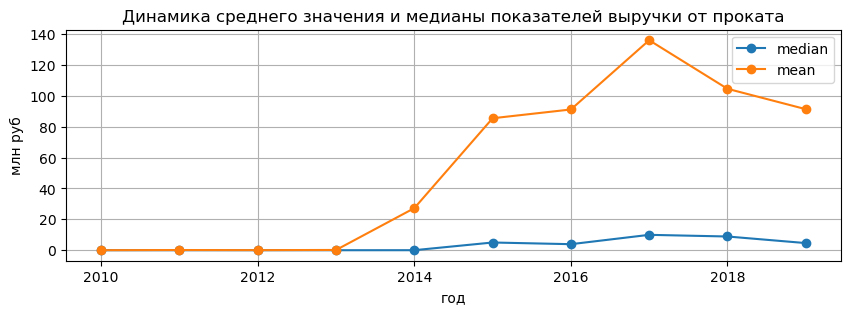

In [57]:
df_year_distrib_mean_med.plot(style='o-',grid=True, figsize=(10, 3))
plt.title('Динамика среднего значения и медианы показателей выручки от проката')
plt.xlabel('год')
plt.ylabel('млн руб')

plt.show()

Сравнение граыиков говорит о том, что в целом рынок кинопроката устойчив и постоянен. Большинство фильмов не блещет большими сборами (об этом говорит медианное значение).

Среднее же значение суммы сборов имеет тенденцию к росту начиная с 2013 года.


При практически неизменной медиане это говорит о том, что на рынок выводится больше лидеров проката - фильмов, собирающих большее количество зрителей, чем большинство. При этом стоит отметить, что количество таких фильмов с 17-го по 19-й год падает. 

### Влияние возрастных ограничений

- Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?
- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

In [58]:
# Отсортируем интересубщий диапазон
df_2015_1019 = df_cinema.loc[df_cinema['show_start_year']>=2015]
df_2015_1019
# Делаем сводную таблицу, сотируем по возрастанию
df_age_box_15_19 = df_2015_1019.pivot_table(index='age_restriction',\
                                           values='box_office', aggfunc='sum')\
.sort_values(by = 'box_office',  ascending=True)
df_age_box_15_19

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,809.077429
«18+» - запрещено для детей,40759.615578
«6+» - для детей старше 6 лет,55798.610800
«12+» - для детей старше 12 лет,60619.446629
«16+» - для детей старше 16 лет,76034.733644


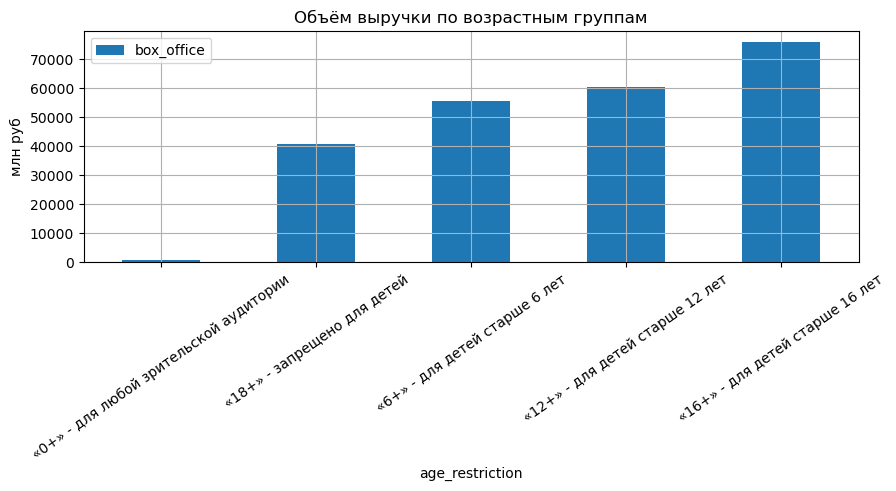

In [59]:
#Строим гистограмму
df_age_box_15_19.plot(kind='bar', grid=True, figsize=(10, 3))
plt.title('Объём выручки по возрастным группам')

plt.ylabel('млн руб')
plt.xticks(rotation = 35)
plt.show()

Минимальную сумму сборов за исследуемый период дают фильмы "0+".\
Максимальную - "16+". Почему именно эта группа выступает дидером по сборам - своё мнение изложим в конце этого раздела, после анализа данных по годам\
\
Посмотрим дальше, с чем это связано.

In [60]:
#для каждой пары возраст-год посчитаем сумму сьоров
df_age_count = df_2015_1019.groupby(['age_restriction', 'show_start_year'])['box_office'].sum()

df_age_count = pd.DataFrame(data=df_age_count) 
display(df_age_count);

box_office
age_restriction                        show_start_year              
«0+» - для любой зрительской аудитории 2015               379.054580
                                       2016               150.228851
                                       2017               229.598930
                                       2018                32.449002
                                       2019                17.746066
«12+» - для детей старше 12 лет        2015             13616.082007
                                       2016             12204.446526
                                       2017              7851.427661
                                       2018             14267.291657
                                       2019             12680.198778
«16+» - для детей старше 16 лет        2015             11368.120866
                                       2016             16664.548543
                                       2017             18745.042900
                                       2018             16503.602350
                                       2019             12753.418985
«18+» - запрещено для детей            2015              5432.308365
                                       2016              6793.929826
                                       2017              9651.495581
                                       2018              8760.085500
                                       2019             10121.796306
«6+» - для детей старше 6 лет          2015              8701.799371
                                       2016             12053.146010
                                       2017             12086.142146
                                       2018             10104.974625
                                       2019             12852.548648

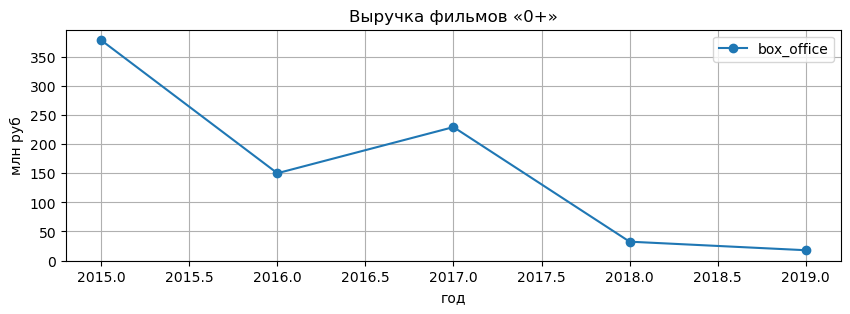

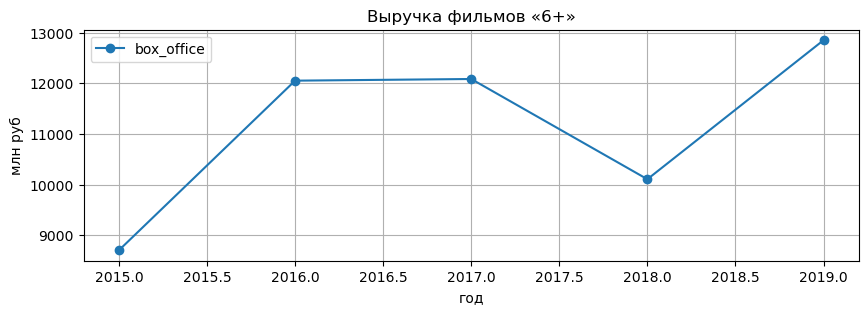

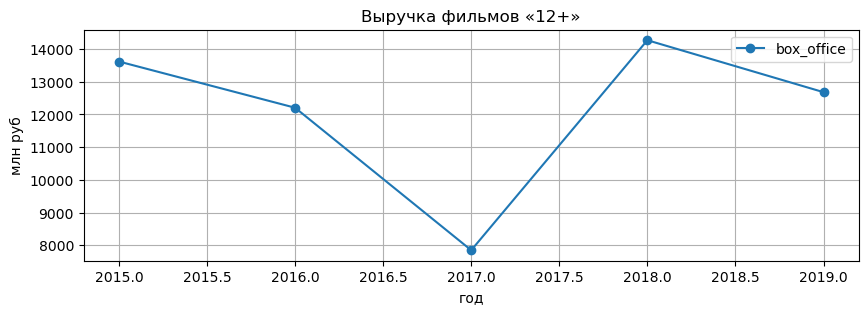

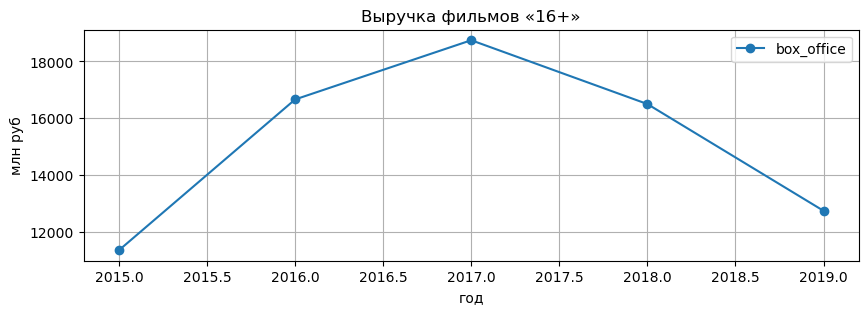

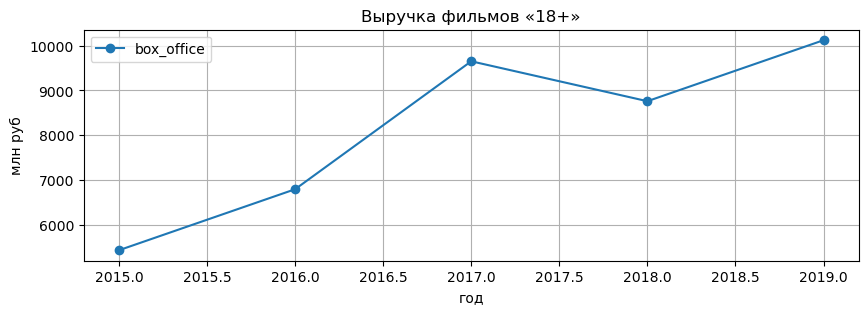

In [61]:
 (
df_2015_1019.query('age_restriction == "«0+» - для любой зрительской аудитории"')
 .pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
.plot( style='o-',  grid=True, figsize=(10, 3)) 
)
#plt.xlabel('год')    
plt.title('Выручка фильмов «0+»')
plt.xlabel('год')
plt.ylabel('млн руб')

(
df_2015_1019.query('age_restriction == "«6+» - для детей старше 6 лет"')
 .pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
.plot(style='o-', grid=True, figsize=(10, 3)) 
)
plt.title('Выручка фильмов «6+»')
plt.xlabel('год')
plt.ylabel('млн руб')

( 
df_2015_1019.query('age_restriction == "«12+» - для детей старше 12 лет"')
 .pivot_table(index='show_start_year', values='box_office', aggfunc='sum') 
.plot(style='o-', grid=True, figsize=(10, 3)) 
)
plt.title('Выручка фильмов «12+»')
plt.xlabel('год')
plt.ylabel('млн руб')

( 
df_2015_1019.query('age_restriction == "«16+» - для детей старше 16 лет"')
 .pivot_table(index='show_start_year', values='box_office', aggfunc='sum') 
.plot(style='o-', grid=True, figsize=(10, 3)) 
)
plt.title('Выручка фильмов «16+»')
plt.xlabel('год')
plt.ylabel('млн руб')

( 
df_2015_1019.query('age_restriction == "«18+» - запрещено для детей"')
 .pivot_table(index='show_start_year', values='box_office', aggfunc='sum') 
.plot(style='o-', grid=True, figsize=(10, 3)) 
)
plt.title('Выручка фильмов «18+»')
plt.xlabel('год')
plt.ylabel('млн руб')

plt.show()

**Прокомментируем полученные графики**

**Группы "6+", "12+"** - несмотря на их нелинейность, каких-либо устойчивых "рыночных" тенденций нет.\
Рост или снижение суммы сборов этих группах обусловлено не интересом зрителей к этой группе фильмов, а иными факторами. 

**Группа "0+"**. Это наиболее общая категория, которая может присваиваться фильмам без выраженной возрастной специфики.\
Отрицательная тенденция сборов и стабильное снижение количества таких фильмов говорит том, что такие фильмы не интересны ни детям ни взрослым - для детей слишком сложно, для взрослых слишко вяло.


**Группа "18+"**. Пложительная тенденция сборов в группе "18+" обусловлена увеличением их количества, что является следствием роста спроса. сприс на фильмы со взрослой тематикой растёт.


**Группа "16+"**. На фоне поведения глупп "0+" и "18+" находит объяснение и график "16+". Эти фильмы в первой чпсти исследуемого периода росли, как альтернатива нулевой группе, но затем начали вытесняться группой "18+", более возрастно определённой, более понятной зрителю (18 лет - это понятный всем рубеж. 16 - что-то не чёткое).

**Ниже приведены графики, подтверждающие динамику количества  фильмов "0+" и "18"**
- общее снижение количесва фильмов группы "0+" с 2010 по 2019 годы
- общий рост количества фильмов группы "18+"

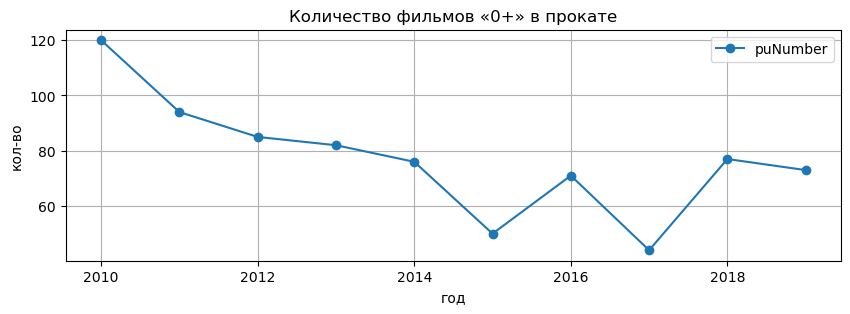

In [62]:
# график, паоказывающий общее снижение количесва фильмов "0+" с 2010 по 2019 годы
( 
df_cinema.query('age_restriction == "«0+» - для любой зрительской аудитории"')
 .pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
.plot(style='o-', grid=True, figsize=(10, 3)) 
)
plt.title('Количество фильмов «0+» в прокате')
plt.xlabel('год')
plt.ylabel('кол-во')
plt.show()

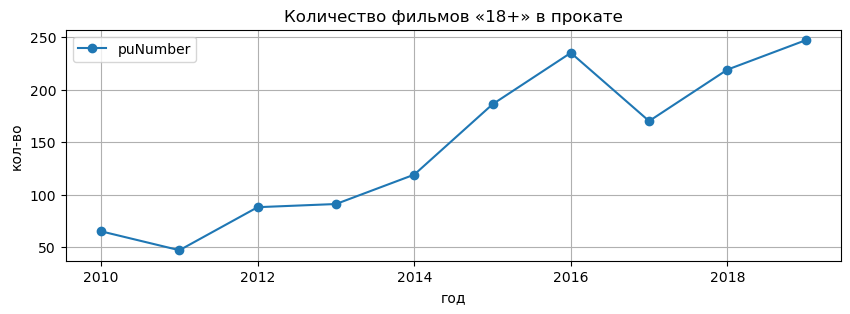

In [63]:
# график, паоказывающий общий рост количесва фильмов "18+" с 2010 по 2019 годы
( 
df_cinema.query('age_restriction == "«18+» - запрещено для детей"')
 .pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
.plot(style='o-', grid=True, figsize=(10, 3)) 
)
plt.title('Количество фильмов «18+» в прокате')
plt.xlabel('год')
plt.ylabel('кол-во')
plt.show()

**Возрастная категория оказывает влияние на сборы**\
И хотя величина сборов в группе зависит от наличия фильмов-кассовых лидеров, тем не менее в 3-х группах из 5 обнаружены тенденции, связанные со зрительским спросом.

.

## Фильмы, которые получили государственную поддержку

- Сколько выделяется средств на поддержку кино,
- как окупаются такие фильмы,
- какой у них рейтинг.

### Предварительный анализ

In [64]:
df_gov = df_cinema.query('budget > 0')
df_gov.info()
#df_gov.head()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 1186 to 6906
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    object             
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64            


In [65]:
df_gov['production_country'].value_counts()

production_country
Россия                                            316
Россия,  Италия                                     2
Россия,  Германия                                   2
Россия,  Франция,  Латвия                           1
Россия,  Украина                                    1
Россия,  Украина,  Польша                           1
Россия,  Германия,  Великобритания                  1
Россия,  Армения                                    1
Россия,  Словакия,  Чехия                           1
Россия,  Латвия,  Чешская Республика                1
Россия,  Германия,  Казахстан,  Польша,  Китай      1
Россия,  Сербия                                     1
Россия,   Грузия                                    1
Россия,  Китай                                      1
Россия,  Бельгия,  Финляндия                        1
Name: count, dtype: int64

Всего за исследуемый период получили финансирование 332 фильма. И все фильмы либо чисто российские, либо с участием России.

### Финансовые показатели

#### Динамика объёмов господдержки с разбивкойа по годам

In [66]:
# Сколько фильмов получили финансирование
df_gov_year = df_gov.pivot_table(index='show_start_year', values='budget', aggfunc='count')
#df_gov_year

In [67]:
# Сколько фильмов выходило в прокат каждый год всего
df_gov_year_distrib = df_cinema.pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
#df_gov_year_distrib

In [68]:
# Сколько Российских фильмов выходило в прокат каждый год
df_distr_rus = df_cinema[df_cinema['main_country'] == 'Россия']
df_rus_year_distrib = df_distr_rus.pivot_table(index='show_start_year', values='puNumber', aggfunc='count')
#df_rus_year_distrib


In [69]:
# Объединяем и считьаем долю фильмов, получивших финансирование
df_gov_year_ratio = df_gov_year.merge(df_gov_year_distrib, on = 'show_start_year', how = 'left')
df_gov_year_ratio['ratio_gov_total_%'] = (
    (df_gov_year_ratio['budget'] / df_gov_year_ratio['puNumber']).round(decimals=3))*100

df_gov_year_ratio_total = df_gov_year_ratio.merge(df_rus_year_distrib, on = 'show_start_year', how = 'left')\
.sort_values(by = 'show_start_year',  ascending=False)

df_gov_year_ratio_total['ratio_gov_rus_%'] = (
    (df_gov_year_ratio_total['budget'] / df_gov_year_ratio_total['puNumber_y']).round(decimals=3))*100
df_gov_year_ratio_total.columns = ['фильмы с господдержкой','всего фильмов в прокате','доля во всём прокате',\
                                   'кол-во росс. фильмов всего','доля среди росс. фильмов']

df_gov_year_ratio_total


,фильмы с господдержкой,всего фильмов в прокате,доля во всём прокате,кол-во росс. фильмов всего,доля среди росс. фильмов
show_start_year,,,,,
2019,70,900,7.8,317,22.1
2018,56,878,6.4,479,11.7
2017,41,499,8.2,129,31.8
2016,61,796,7.7,184,33.2
2015,86,695,12.4,194,44.3
2014,16,752,2.1,137,11.7
2013,2,598,0.3,77,2.6


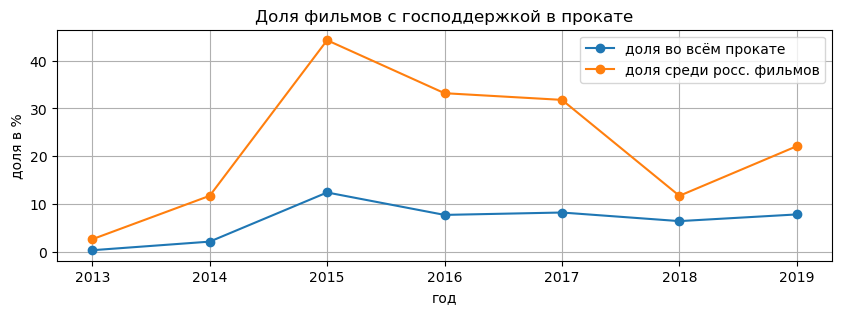

In [70]:
df_gov_year_ratio_total[['доля во всём прокате', 'доля среди росс. фильмов']].plot(style='o-', grid=True, figsize=(10, 3))

plt.title('Доля фильмов с господдержкой в прокате')
plt.xlabel('год')
plt.ylabel('доля в %')
plt.show()

Доля в прокате фильмов с господдержкой в сравнении с общем кол-вом фильмов, произведённых в России росла с 2013 года.\
В 2015 году было максимальное значение доли таких фильмов.\
После чего наблюдается спад  до 2018 году с дальнейшем ростом. Спад доли в этом году вызван выходом большого количества отечественных фильмов, что видно в приведённой выше таблице.\
\
Данные до 2013 года отсутствуют, либо господдержка до 2013 года не осуществлялась.

#### Доля господдержки в общем бюджете фильмов и её распределение по годам

In [71]:
# Группируем данные и считаем 'count' и среднее значение
df_share_gov_mean_med_year = df_gov.groupby('show_start_year').agg({'share_gov_funding': ['median', 'mean']}).round(decimals=2)

# Убираем двойную индексацию столбцов, затем переименовываем их
df_share_gov_mean_med_year.columns = df_share_gov_mean_med_year.columns.droplevel()
df_share_gov_mean_med_year.columns = ['median', 'mean']
df_share_gov_mean_med_year

,median,mean
show_start_year,,
2013,0.47,0.47
2014,0.58,0.55
2015,0.62,0.56
2016,0.64,0.58
2017,0.52,0.51
2018,0.60,0.55
2019,0.58,0.51


Мы видим, что господдержка срставляет примерно половину бюджета фильмов и этот показатель относительно стабилен.\
Нет фильмов, выпущенных полностью за счёт государства.

#### Окупаемость и возврат господдержки

In [72]:
# Объём господдержки по годам
df_gov_budget_year = df_gov.pivot_table(index='show_start_year',\
                                        values= {'budget', 'box_office', 'refundable_support'}\
                                        , aggfunc='sum') 
#display(df_gov_budget_year)

# Окупаемость быджетных вложений (с точки зрения спонгсора, то есть государства)
df_gov_budget_year['payback_%'] = ((df_gov_budget_year['box_office']\
                                         / df_gov_budget_year['budget'])*100).round(decimals=2)

# Вероятность возврата быджетных вложений (возвратная часть)
df_gov_budget_year['payback_3_%'] = ((df_gov_budget_year['box_office']\
                                         / df_gov_budget_year['refundable_support'])*100).round(decimals=2)

df_gov_budget_year.columns = ['сборы, млн руб','суммарный бюджет','возвратная часть ГП',\
                              'окупаемость общая %','вероятность возврата ГП %']
display(df_gov_budget_year)


,"сборы, млн руб",суммарный бюджет,возвратная часть ГП,окупаемость общая %,вероятность возврата ГП %
show_start_year,,,,,
2013,20.322386,255.435390,0.000000,7.96,inf
2014,1017.422166,1302.484783,71.000000,78.11,1432.99
2015,5785.285414,7738.669207,637.153119,74.76,907.99
2016,6081.707840,7554.942748,921.500000,80.50,659.98
2017,10865.075301,7057.172568,719.346881,153.96,1510.41
2018,9934.069013,7000.664099,662.000000,141.90,1500.61
2019,8409.627457,12722.866609,928.000000,66.10,906.21


Построим графики

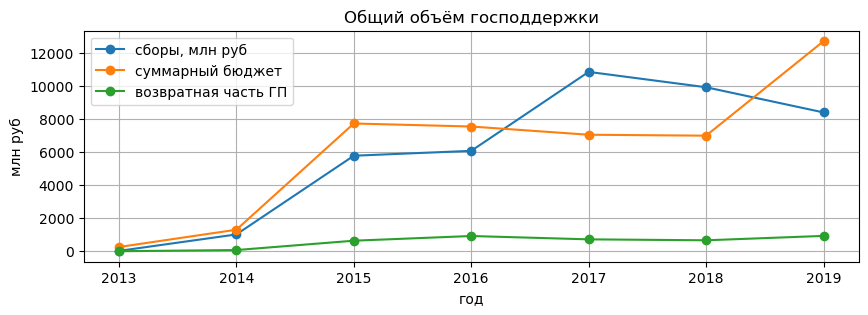

In [73]:
df_gov_budget_year[['сборы, млн руб', 'суммарный бюджет','возвратная часть ГП']].plot(style='o-',grid=True, figsize=(10, 3))
plt.title('Общий объём господдержки')
plt.xlabel('год')
plt.ylabel('млн руб')
plt.show()

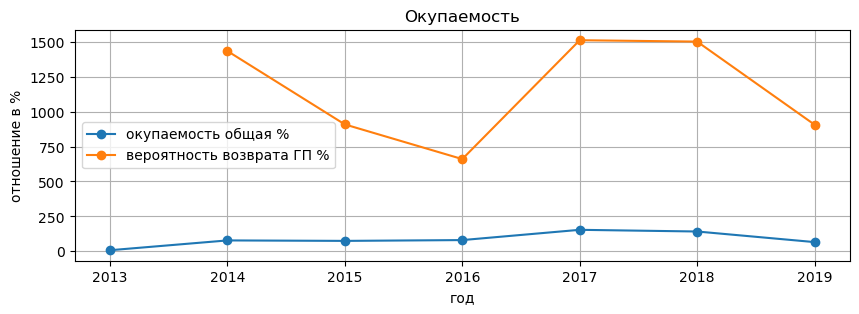

In [74]:
df_gov_budget_year[['окупаемость общая %', 'вероятность возврата ГП %']].plot(style='o-',grid=True, figsize=(10, 3))
plt.title('Окупаемость')
plt.xlabel('год')
plt.ylabel('отношение в %')

plt.show()

Мы видим, какая окупаемость вложенных средств с разбивкой по годам и оценку вероятности получения возвратной части господдержки обратно в бюджет.

Не все фильмы с гос поддержкой смогли окупить средства (тольго в 2017 и 2018 годах суммарные сборы выше суммарных затрат).\
Тем не менее, судя по значительному превышению выручки над объемом возвратной части ГП фильмы с ГП мели хорошую возможность вернуть возвратную часть финансирования обратно в буджет государства.\
Особенно удачным был 2017 и 2018 годы.

>В 2013 году вероятность возврата не может быть оценена, так как за этот год есть всего один фильм с ГП

#### Рейтинги. Популярность фильмов с господдержкой

Рейтинги фильмов с господдержкой целесообразно сравнить с рейтингами российских фильмов без господдержки.

In [75]:
#рейтинги
# с гос поддержкой
df_gov_budget_ratings = df_gov.groupby('show_start_year')['ratings'].agg(['count', 'mean', 'median'] )
#display(df_gov_budget_ratings)

# без гос поддержки
df_nobudget = df_cinema[df_cinema['budget'].isna()]
df_nobudget = df_cinema[df_cinema['main_country'] == 'Россия']

df_nobudget_ratings = df_nobudget.groupby('show_start_year')['ratings'].agg(['count', 'mean', 'median'] )
#display(df_nobudget_ratings)

# объединяем
df_all_df_nobudget_ratings = df_gov_budget_ratings.merge(df_nobudget_ratings, on = 'show_start_year', how = 'left')\

df_all_df_nobudget_ratings.columns = ['всего с поддержкой','средий рейтинг с поддержкой',\
                                      'медиана с поддержкой','всего росс. фильмов','средний росс. рейтинг',\
                                      'медианный росс. рейтинг']

df_all_df_nobudget_ratings


,всего с поддержкой,средий рейтинг с поддержкой,медиана с поддержкой,всего росс. фильмов,средний росс. рейтинг,медианный росс. рейтинг
show_start_year,,,,,,
2013,2,6.700000,6.7,75,5.874667,6.10
2014,15,6.006667,6.4,112,6.050000,6.30
2015,83,6.139759,6.2,149,6.010067,6.20
2016,57,5.677193,5.8,126,5.967460,6.15
2017,39,6.000000,6.2,93,5.986022,6.20
2018,53,6.001887,6.2,279,6.398208,6.50
2019,67,6.176119,6.2,196,6.431122,6.30


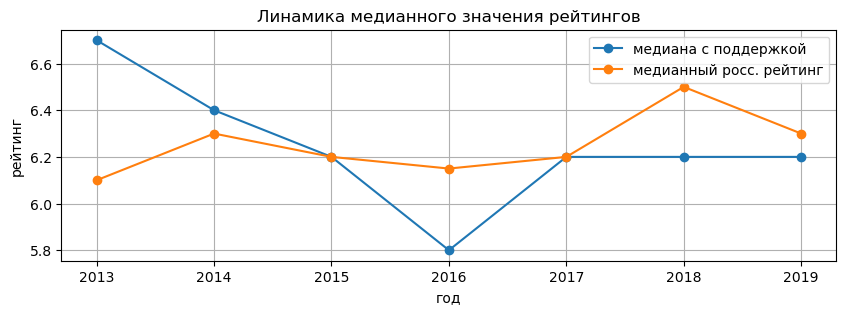

In [76]:
df_all_df_nobudget_ratings[['медиана с поддержкой', 'медианный росс. рейтинг']].plot(style='o-',grid=True, figsize=(10, 3))
plt.title('Линамика медианного значения рейтингов')
plt.xlabel('год')
plt.ylabel('рейтинг')

plt.show()

2013 год не является показательным, так как в нём был всего один фильм с господдержкой, который имел высокий рейтинг.\
В перилд с 2014 по 2019 год рейтинг фильмов с господдержкой был либо равен (практически равен), либо незначительно ниже рейтинга обычного российского фильма.\
В целом же, рейтинги российских фильмов выше среднего.

#### Жанры фильмов, получавших господдержку

In [77]:
# Количество фильмов по жанрам
df_gov['main_genre'].value_counts()

main_genre
драма          93
комедия        74
мультфильм     31
триллер        15
мелодрама      15
фэнтези        11
фантастика     11
ужасы          10
военный         9
семейный        7
приключения     7
боевик          6
детектив        5
детский         4
мюзикл          4
история         4
биография       3
спорт           3
криминал        3
реальное ТВ     1
Name: count, dtype: int64

Лидеры - драма (93 фильма), комедия (74 фильма) и мультфильм (31 фильм). 

In [78]:
# Выравниваем индексацию, для избежания предупреждений о воэможных ошибках
df_gov = df_gov.reset_index(drop=True)
# Находим сумму ГП и строим таблицу
df_gov['support_total'] = df_gov['refundable_support'] + df_gov['nonrefundable_support']
df_gov_year_genre = df_gov.pivot_table(
    index='main_genre', values= 'support_total', aggfunc='sum').sort_values(by = 'support_total',  ascending=True)
df_gov_year_genre

,support_total
main_genre,
реальное ТВ,53.000000
биография,112.510000
детский,119.000000
мюзикл,240.453119
криминал,280.000000
боевик,334.000000
семейный,339.000000
ужасы,355.000000
мелодрама,398.000000


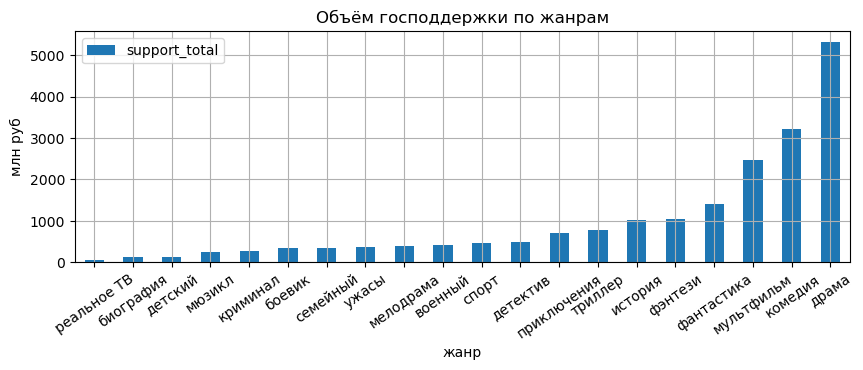

In [79]:
#Строим гистограмму
df_gov_year_genre.plot(kind='bar', grid=True, figsize=(10, 3))

plt.title('Объём господдержки по жанрам')
plt.xlabel('жанр')
plt.ylabel('млн руб')
plt.xticks(rotation = 35)
plt.show()

Наибольший объем господдержки приходится в исследуемый период на драму, комедии и мультфильмы.\
Меньше всего - на детские, биографии и реальное ТВ.\
Распределение финансирования не полностью совпадает с количеством выпущеных в каждом жанре фильмов.\
>На пример - мелодрамма. По количеству фильмов находится на 4-м месте, но по объемам господдержки - на 11-ом 

#### Режиссёры, фильмы которых получали господдержку

In [80]:
# строим таблицу
df_gov_year_director = df_gov.pivot_table(
    index='first_director', values= 'support_total', aggfunc='sum').sort_values(by = 'support_total',  ascending=False)

# Выбираем только 10 лидеров
df_gov_year_director_10 = df_gov_year_director.iloc[:10, :]
df_gov_year_director_10

,support_total
first_director,
Ф.Бондарчук,750.000000
Н.Хомерики,660.000000
А.Кравчук,500.000000
Р.Давлетьяров,459.847945
А.Мизгирев,450.000000
Н.Лебедев,442.104482
А.Мегердичев,400.000000
Д.Дьяченко,351.000000
А.Цицилин,350.000000


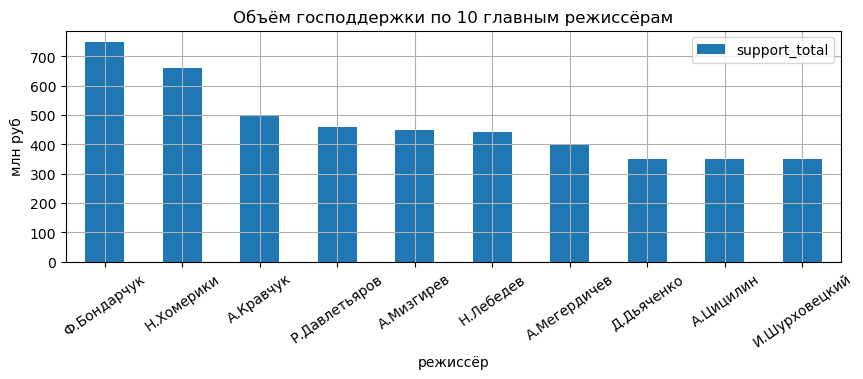

In [81]:
#Строим гистограмму
df_gov_year_director_10.plot(kind='bar', grid=True, figsize=(10, 3))

plt.title('Объём господдержки по 10 главным режиссёрам')
plt.xlabel('режиссёр')
plt.ylabel('млн руб')
plt.xticks(rotation = 35)
plt.show()

Тройка главных режиссёров, фильмы которых получили с 2013 по 2019 год наибольшую поддержку от государства:
- Ф.Бондарчук -- 750 млн руб
- Н.Хомерики --	660 млн руб
- А.Кравчук  -- 500 млн руб

## Общий вывод

### Проблемы набора данных, предоставленных для исследования

1. В датасете были представлены рейтинги фильмов из разнях систем.
   Так как нас интересует популярность фильма, то не так важно, какой методикой выведен рейтинг.
   В  любом случае принцип - чем больше цифра, тем выше популярность - соблюдается.\
   Но тем не менее, это - ошибка организации сбора данных.\
   В рамках проведенного исследования эта проблема была минимизирована.\
   .
2. Категориальные значения.\
   Основная проблема - отсутствие какоё-либо системы заполнение данных.
   Осутствие системы в текстовой информации, вызванно прежде всего разнородностью содержания,
   источников и времени ввода.

Такие ошибки, на наш взгляд, неизбежны. С одной стороны присутствует, человеческий фактор, с другой - объективная реальность.
>**Рекомендация:** частично ошибки ввода можно ликвидировать программными средствами, введя принудительное форматирование

К сожалению, практически невозможно ввести какие - либо нормы для названий фильмов, студий и т.п.
Особенно это касаетсяя имён собственных - нет адекватных норм транскрипции с иностранных языковю.
>В этом свете два таких разных написания имени одного и того же человека - ХЭрольд Рэмис / Гарольд Реймис в столбце 'director'- не вызывают удивления.

>Кроме того, даже при внесении одних и тех же данных разными людьми в разное время может применяться разный порядок слов, имён и названий, а также разное синтаксическое оформление (или скобки, или кавычки или тире в похожих ситуациях). Мы не можем предугадать все возможные варианты.

### Количественные показатели

1. Не наблюдается какой-либо определённой тенденции связи года и количества фильмов, которую можно было бы установить исходя их имеющегося датаскта.\
   Заментый пик в 2010 году и снижение в 2017 году могут быть объяснены внешними факторами -   финансовыми, юридическими, административными и т.п.
     

2. Есть определённая зависимость года и количества фильмов с данными о выручке.\
   Количество таких фильмов растёт от года к году, за исключением 2017-го.\
   Снижение в 2017 году вызвано снижением общего количества фильмов, вышедших на экран в этом году.
   

3. Доля фильмов с указанной информацией о прокате имеет положительную тенденцию - количество таких фильмов растёт.\
   Вероятно, это связано с улучшением отчётности и совершенствованием нормативной базы в финансовой сфере.\
   Полнее всего представлен в данных 2017 год. И хотя после него идёт некоторое снижение, в целом тренд положительный.


### Сборы от проката


В метрике "сборы от проката отчётливо проявляются 2 периода - 2010-2014 и 2015-2019.\
   Внутри каждого из них график достаточно ровный, что говорит об устойчивости рынка кинопроката.

1. При этом близкие к нулю значения с 2010 по 2013 г - результат особенностей данных. Проблема, видимо в том, что до 2015 года сбор данных о кассовых сборах не был налажен.


2.  С 2013 по 2015 год наблюдается рост показателя выручки, что связано, скорее всего, с улучшением отчётности, а не с ростом самого рынка.


3. В период 2015 - 2019 динамика практически отсутствует. Что вполне логично - методы и меры, регулирующие отчётность, усовершенствованы и работают.

Сам же рынок кинопроката не меняется - количество точек показа не меняется, интерес населения к коно также постоянен.

в целом рынок кинопроката устойчив и постоянен. Большинство фильмов не блещут большими сборами (до 10 млн руб в год).\
Тем не менее, среднее значение суммы сборов имеет тенденцию к росту.\
Это говорит о том, что на рынок выводится больше лидеров проката - фильмов, собирающих большее количество зрителей. При этом стоит отметить, что количество таких фильмов с 17-го по 19-й год падает.

>**Рекомендация** Целесообразно выделитьв отдельную метрику сборы для каждого фильма он-лайн, отдельно от офф-лайн. Это разные "экосистемы" и зрители ведут себя в них, вероятно, по-разному.   


### Влияние возрастных ограничений

1. Минимальную сумму сборов за исследуемый период дают фильмы "0+".\
   Максимальную - "16+".
   
2. На наш взгляд Имеется ряд тенденций, проявившихся в 3-х из 5-и возрастных группах.


>**Группа "0+"**. Это наиболее общая категория, которая может присваиваться фильмам без выраженной возрастной специфики.
Отрицательная тенденция сборов и стабильное снижение количества таких фильмов говорит том, что такие фильмы не интересны ни детям ни взрослым - для детей слишком сложно, для взрослых слишко вяло.

>**Группа "18+"**. Пложительная тенденция сборов в группе "18+" обусловлена увеличением их количества, что является следствием роста спроса. сприс на фильмы со взрослой тематикой растёт.

>**Группа "16+"**. На фоне поведения глупп "0+" и "18+" находит объяснение и график "16+". Эти фильмы в первой чпсти исследуемого периода росли, как альтернатива нулевой группе, но затем начали вытесняться группой "18+", более возрастно определённой, более понятной зрителю (18 лет - это понятный всем рубеж. 16 - что-то не чёткое).

>**Группы "6+", "12+"** - несмотря на их нелинейность, каких-либо устойчивых "рыночных" тенденций нет.
Рост или снижение суммы сборов этих группах обусловлено не интересом зрителей к этой группе фильмов, а иными факторами. 

**Возрастная категория оказывает влияние на сборы**.

И хотя величина сборов в группе зависит от наличия фильмов-кассовых лидеров, тем не менее в 3-х группах из 5\
**обнаружены тенденции, связанные со зрительским спросом.**

>**В перспективе** стоит обратить внимание на Группы "6+", "12+" в которых не удалось выявить какие-либо тенденции.\
Возможно, изменения зрительского интереса связаны с жанровым составом этих групп.
В целом, исследование распределения  жанровых предпочтений среди аудитории может дать интересные результаты 

### Фильмы с государственной поддержкой

1. Всего за исследуемый период получили финансирование 332 фильма.\
   И все фильмы либо чисто российские, либо с участием России.
   

2. Лидеруют по количеству фильмов, получивших господдержку - драма (93 фильма), комедия (73 фильма) и мультфильм (31 фильм). Эти же группы - лидеры по объёму государственной поддержки.


3. режиссёров, фильмы которых получили с 2013 по 2019 год наибольшую поддержку от государства:\
   Ф.Бондарчук, Н.Хомерики, А.Кравчук.
   

4. Доля в прокате фильмов с господдержкой в сравнении с общем кол-вом фильмов произведённых в России росла с 2013 года.\
   В 2015 году было максимальное значение доли таких фильмов. После чего наблюдается спад до 2018 году с дальнейшем ростом. Спад доли в этом году вызван выходом на экран большого количества российских фильмов в целом.\
   Данные до 2013 года отсутствуют, либо господдержка до 2013 года не осуществлялась.
 

5. Не все фильмы с гос поддержкой смогли окупить вложенные средства (тольго в 2017 и 2018 годах суммарные сборы выше суммарных затрат).\
   Тем не менее, судя по значительному превышению выручки над объемом возвратной части ГП фильмы с ГП мели хорошую возможность вернуть возвратную часть финансирования обратно в буджет государства.\
   Особенно удачным был 2017 и 2018 годы.
   >**В перспективе** За рамками данного исследования осталось сравнение окупаемости фильмов с ГП и без неё. Кроме того остался не решённым методологический вопрос - что именно мы принимаем за расходы при расчёте окупаемости - весь бюджет, только возвратную часть ГП, бюдже за минусом невозвратной части   Ответ на этот вопрос, вероятно, зависит от заказчика исследования - является ли он госорганом, частным инвестором или продюсером самого фильма. 
   

6. Рейтинги. Популярность фильмов с господдержкой.\
   В перилд с 2014 по 2019 год рейтинг фильмов с господдержкой был либо равен, либо незначительно ниже рейтинга обычного российского фильма.\
   Но тот факт, что рейтинги той и другой группы выше среднего уровня и различие между ними незначительно, говорит о том, что независимо от источников финансирования, отечественные фильмы находят теплый прием у зрителей.
   >**В перспективе** Также в дальнейшем было бы целесообразно было бы исследовать корреляцию рейтингов и кассовых сборов. Гипотеза, что корреляция должно быть сильно выраженной, может не подтвердиться. Так как мы имеем рейтинги, полученные в он-лайн среде, а кассовые сборы в офф-лайн.  